### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [141]:
data = pd.read_csv('Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [144]:
data.shape

(7043, 21)

In [145]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [146]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [147]:
data_grp = data.groupby('gender')

In [148]:
data_grp[['SeniorCitizen', 'MonthlyCharges']].apply(lambda x: x / x.sum())

,SeniorCitizen,MonthlyCharges
0,0.000000,0.000131
1,0.000000,0.000249
2,0.000000,0.000235
3,0.000000,0.000185
4,0.000000,0.000311
...,...,...
7038,0.000000,0.000371
7039,0.000000,0.000454
7040,0.000000,0.000130
7041,0.001742,0.000325


## Data preprocessing

#### Encoding

In [149]:
data = data.drop(columns=['customerID'],axis=1)

In [150]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [151]:
Features = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in Features:
    data[i] = lab_enc.fit_transform(data[i])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [152]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [153]:
data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

### EDA

#### Data distribution

In [154]:
import warnings
warnings.filterwarnings('ignore')

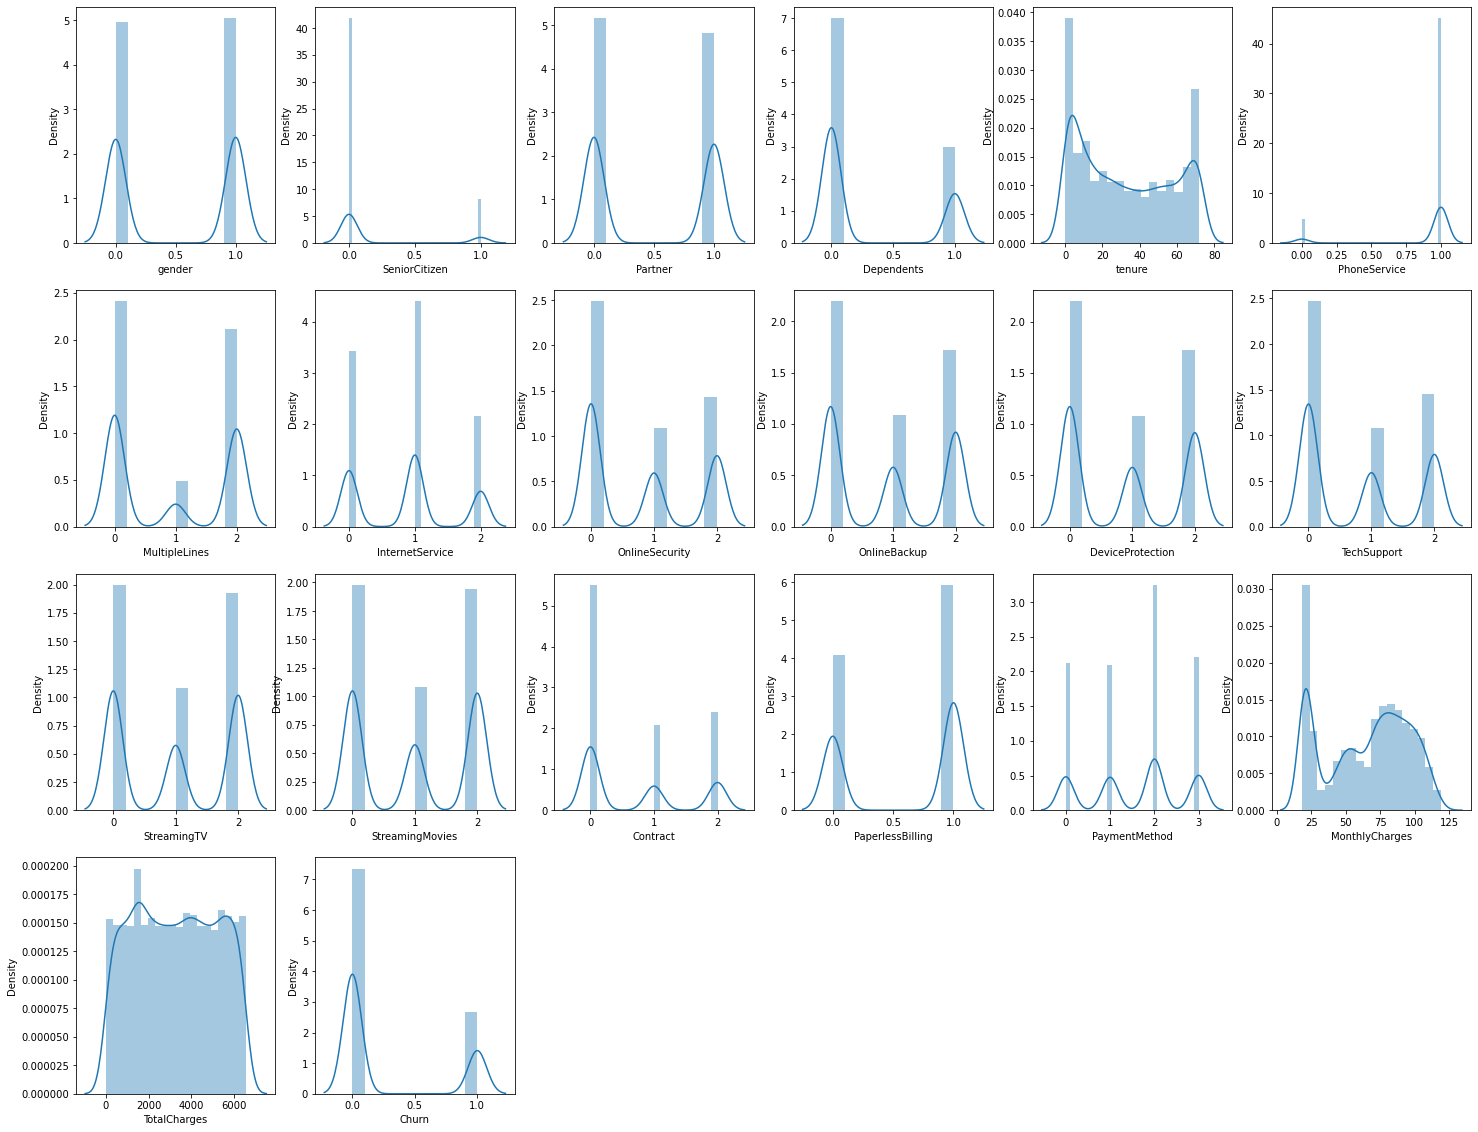

In [155]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in data:
    if plotnumber<=21: #as there are 21 columns in data
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

### continuous column
- Tenure
- MonthlyCharges
- Totalcharges

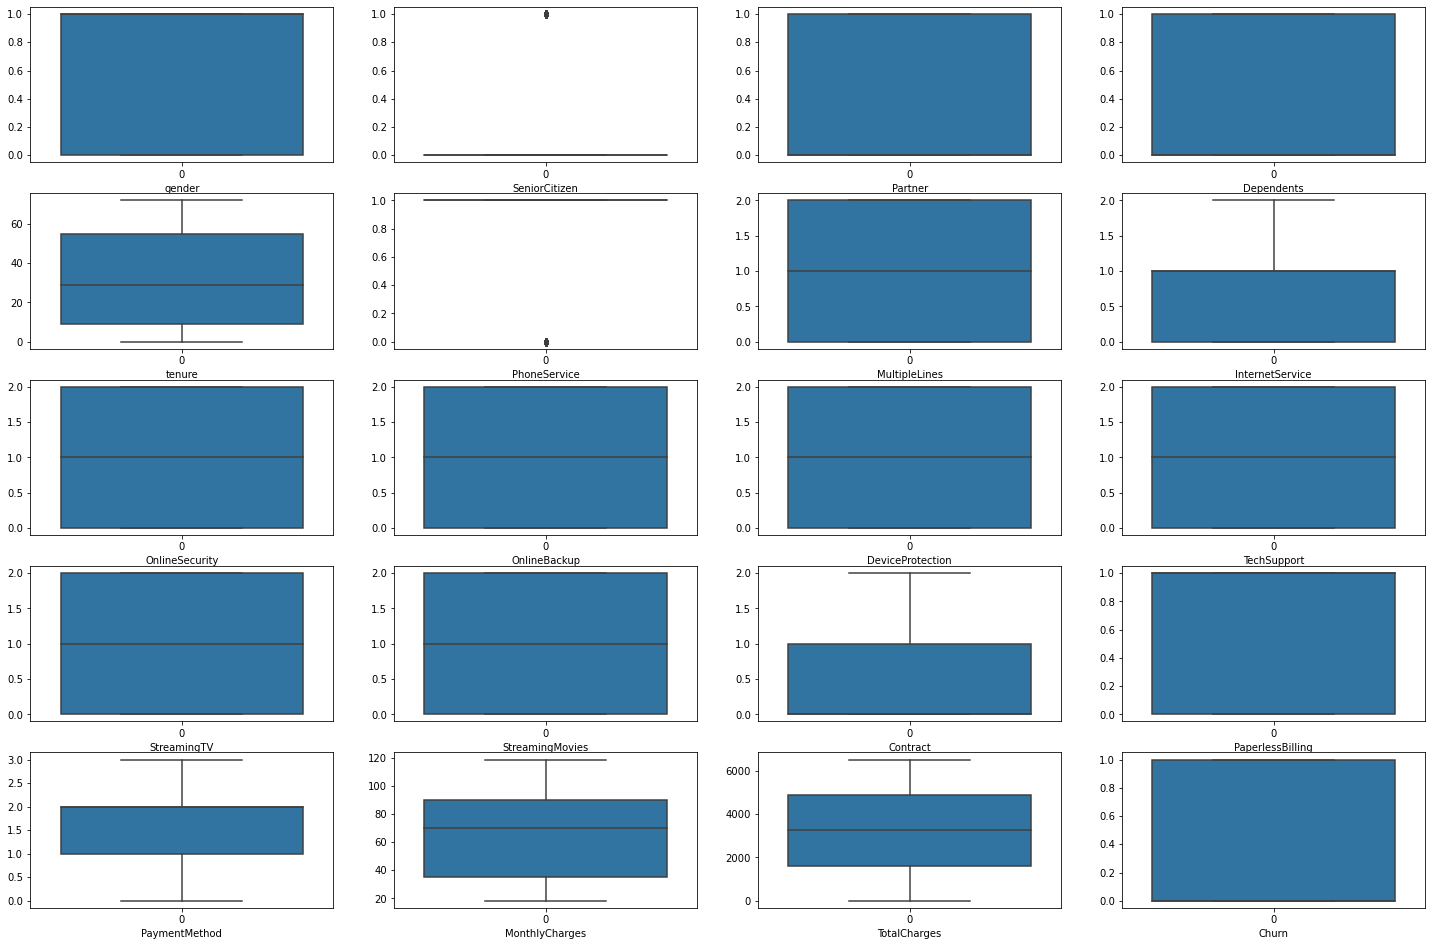

In [156]:
plt.figure(figsize=(25,20))
graph=1

for column in data:
    if graph<=21:
        ax=plt.subplot(6,4,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

### Univariate analysis

In [157]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

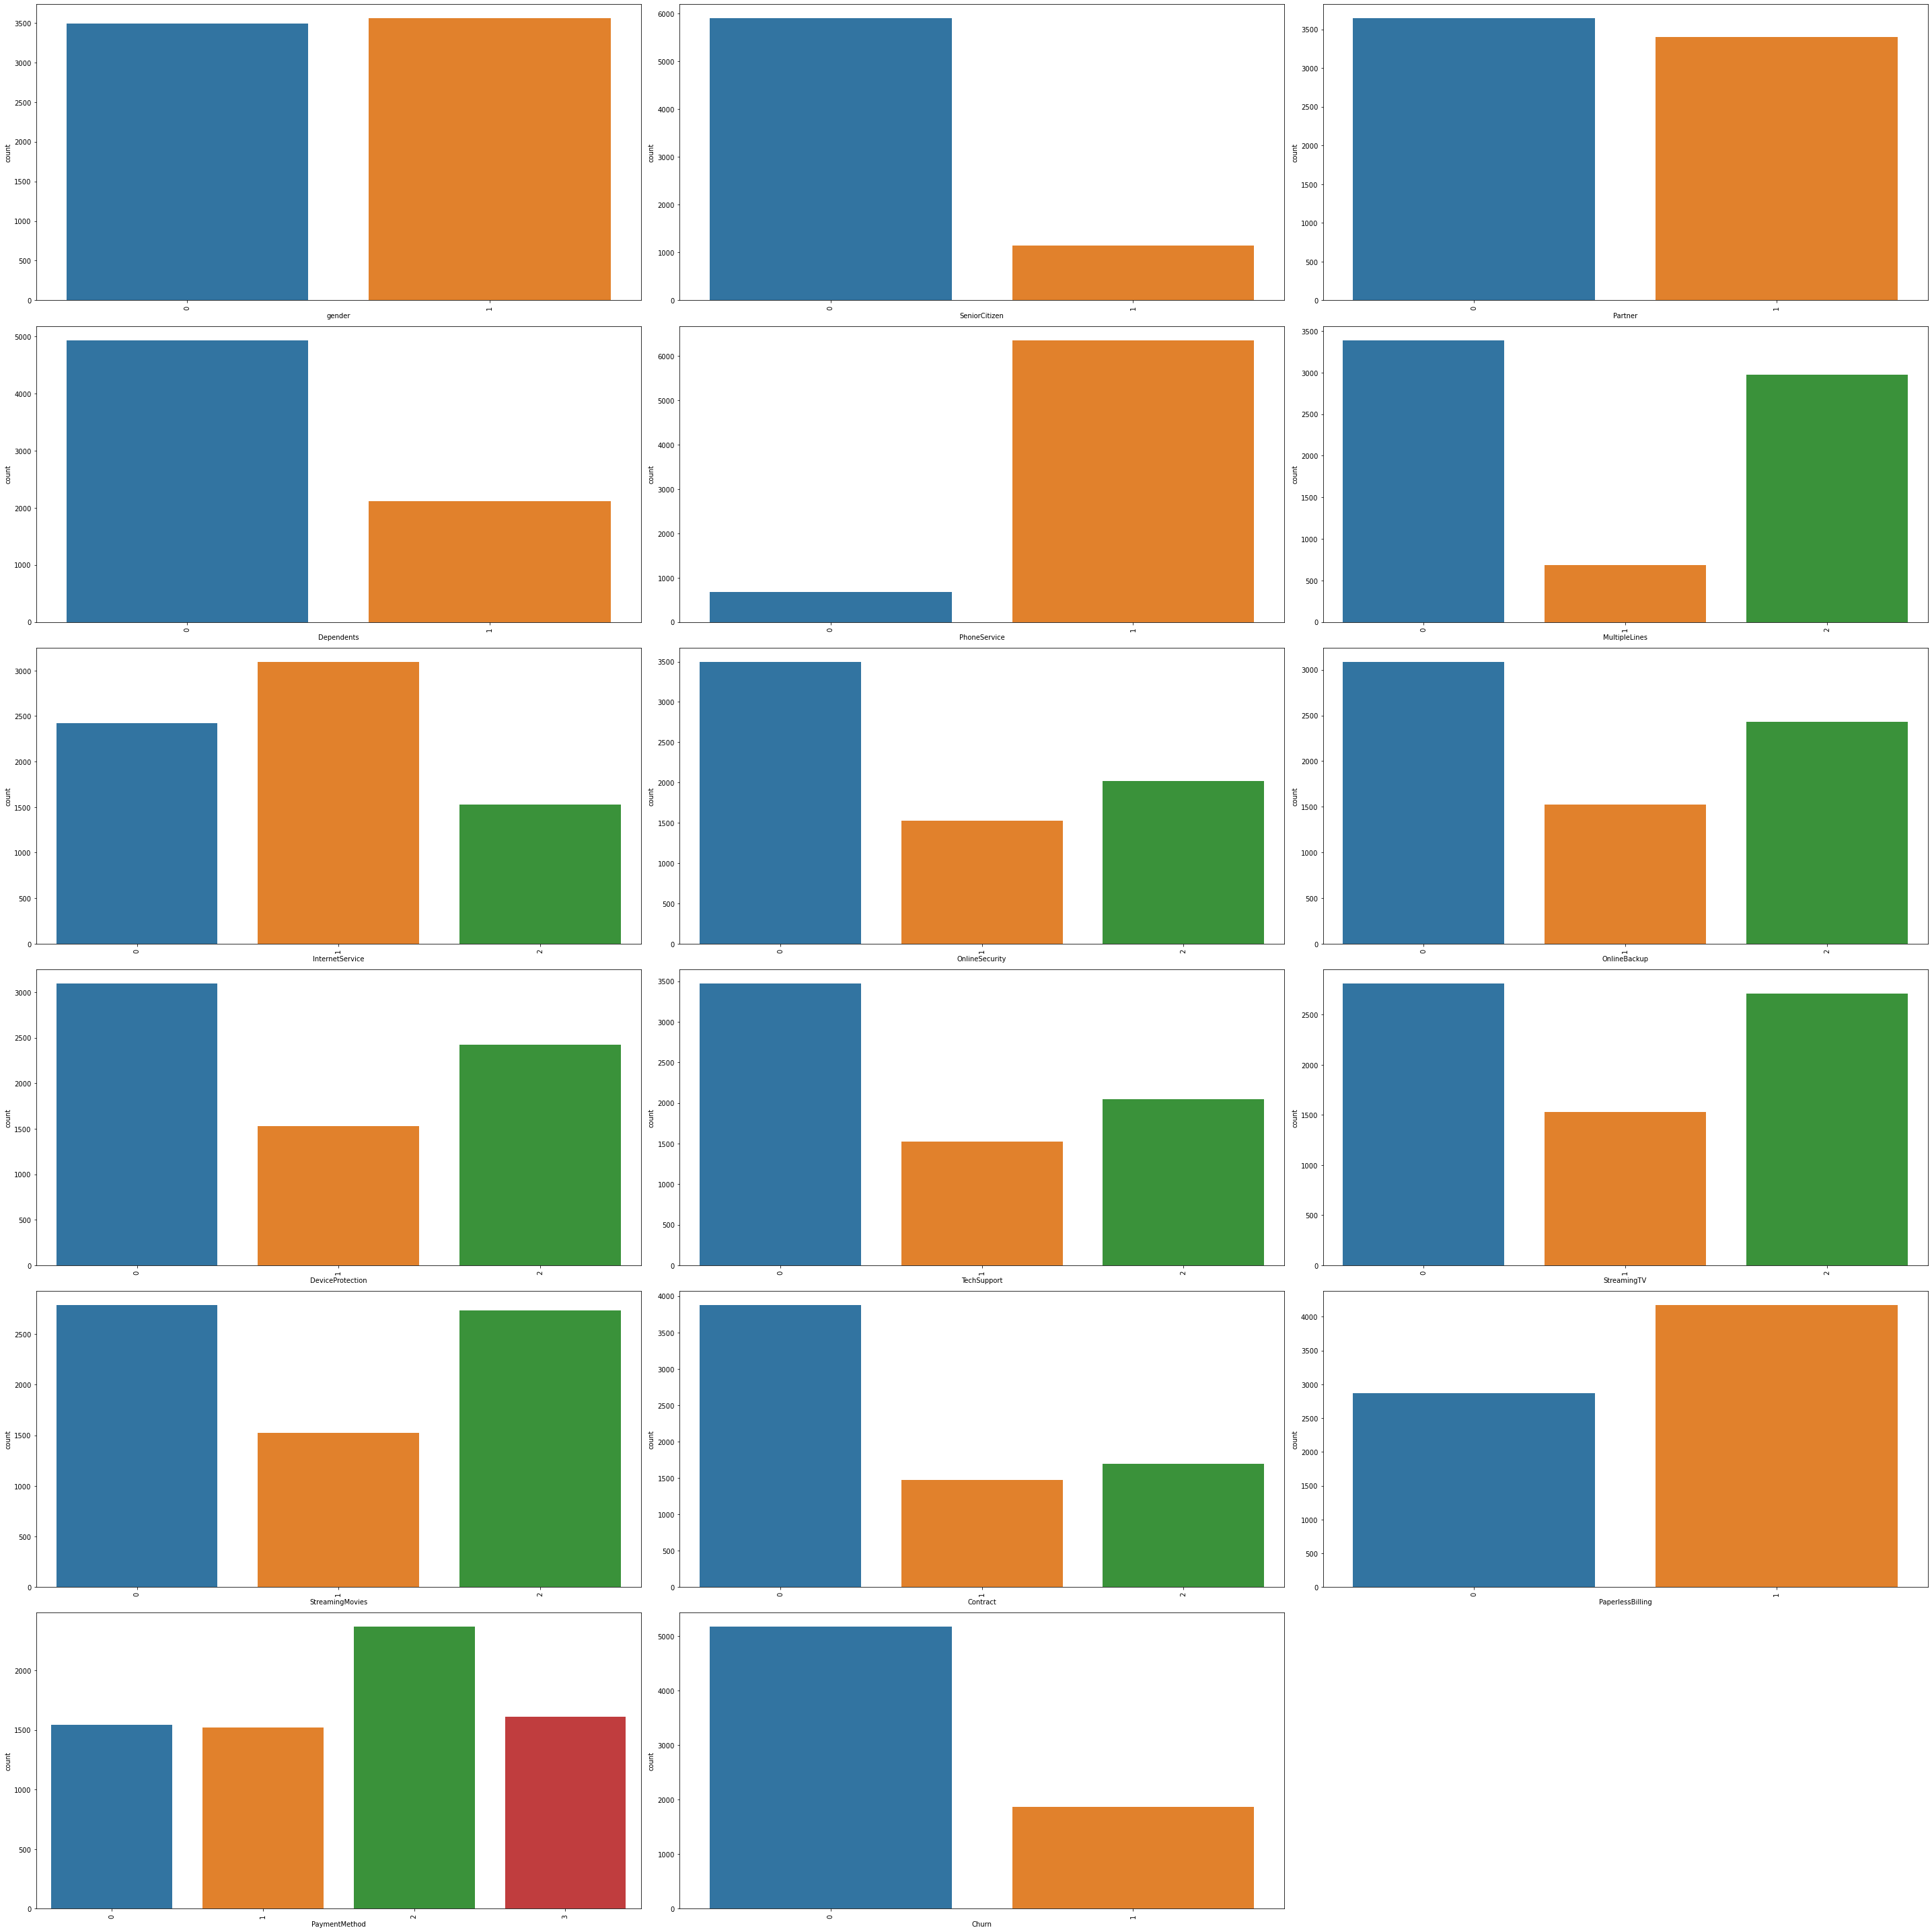

In [158]:
count_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
plt.figure(figsize=(40,40))
for i in range(len(count_col)):
  plt.subplot(6,3,i+1)
  sns.countplot(data[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

In [159]:
abs(data.corr()['Churn']).sort_values(ascending=True)

gender              0.008612
PhoneService        0.011942
TotalCharges        0.014479
StreamingTV         0.036581
MultipleLines       0.038037
StreamingMovies     0.038492
InternetService     0.047291
PaymentMethod       0.107062
Partner             0.150448
SeniorCitizen       0.150889
Dependents          0.164221
DeviceProtection    0.178134
PaperlessBilling    0.191825
MonthlyCharges      0.193356
OnlineBackup        0.195525
TechSupport         0.282492
OnlineSecurity      0.289309
tenure              0.352229
Contract            0.396713
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:title={'center':'Correlation with Churn'}>

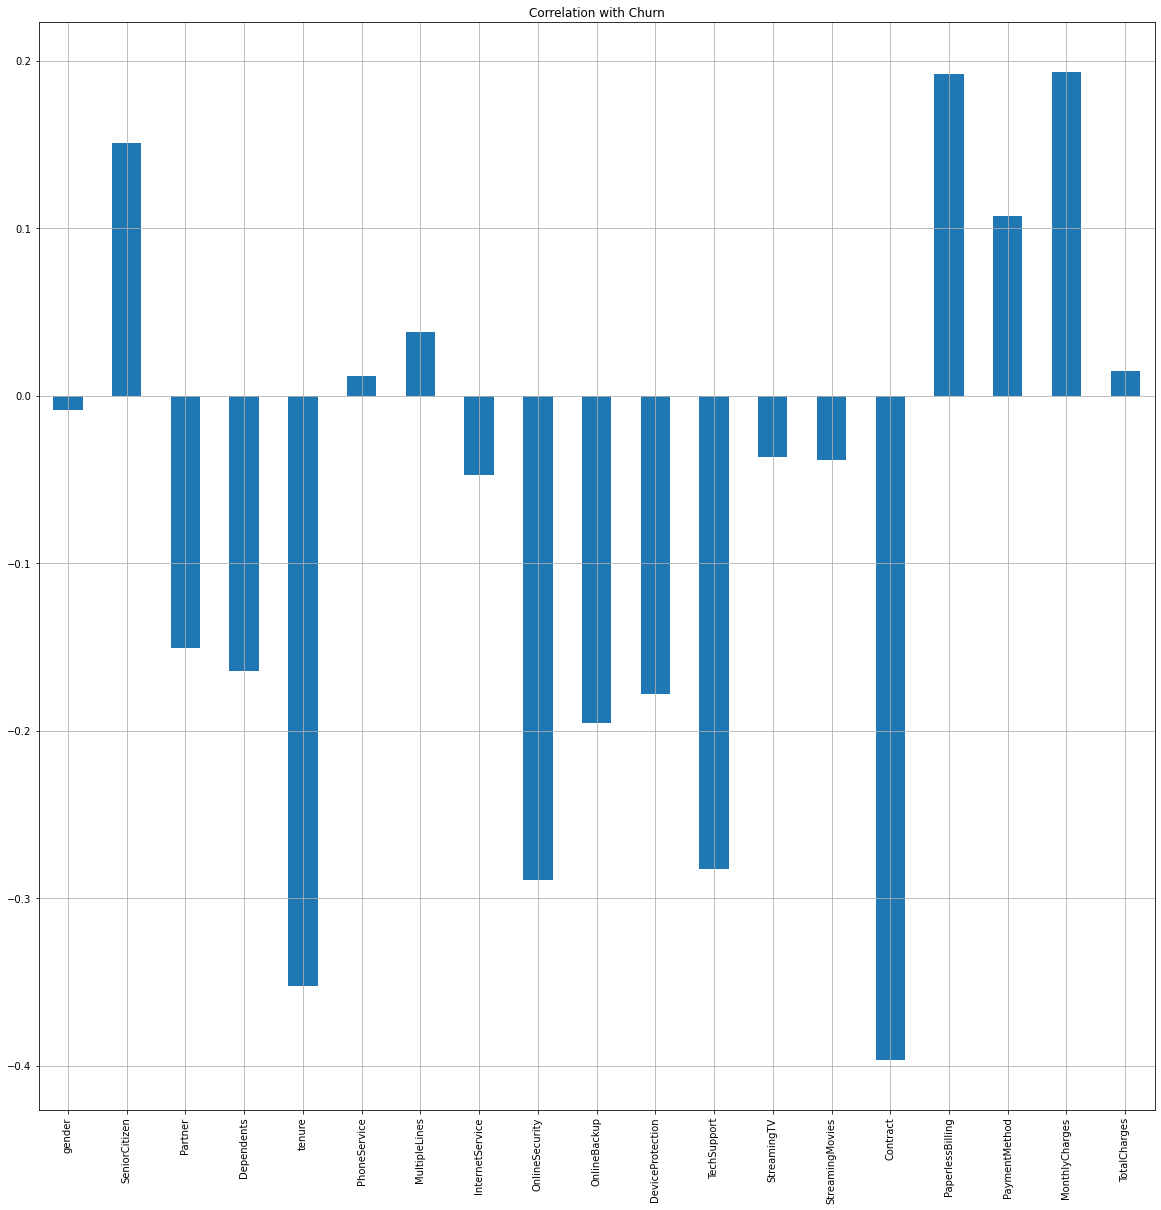

In [160]:
# visualize the correlation
data.drop('Churn', axis =1).corrwith(data['Churn']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with Churn')

<function matplotlib.pyplot.show(close=None, block=None)>

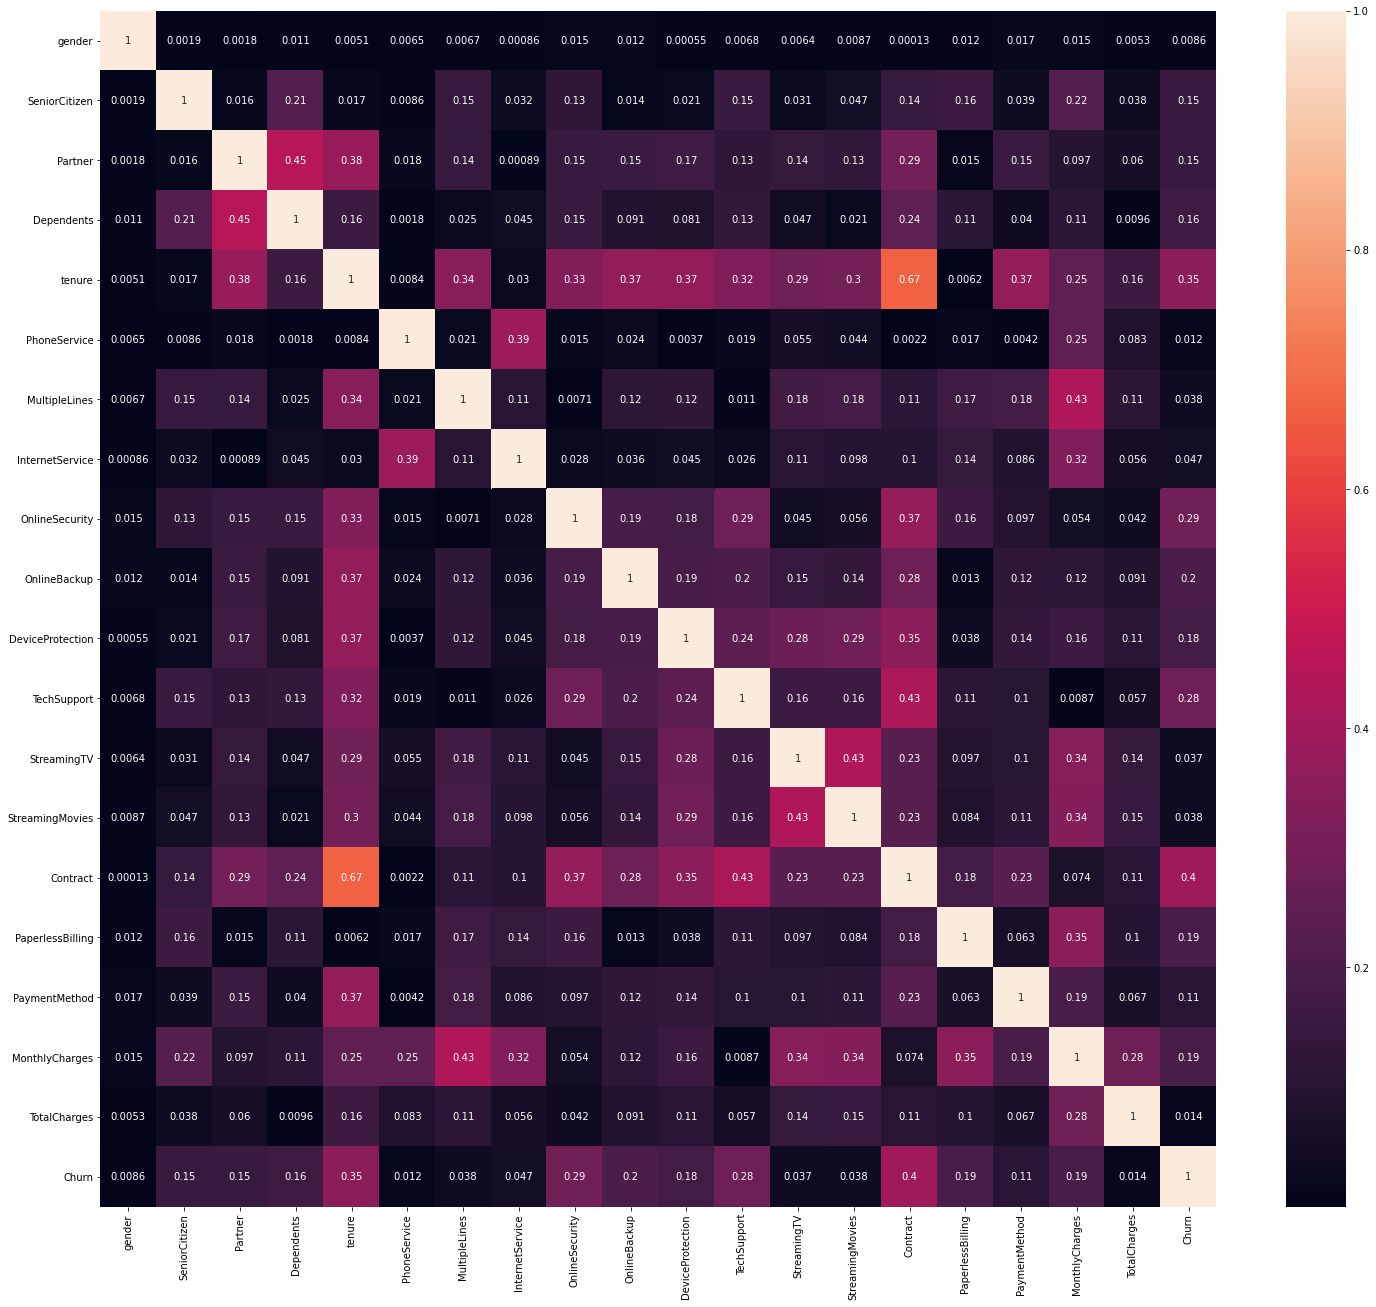

In [161]:
### heatmap
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

### there can be multicolinearity we will cross check it by Vif 

### Data Normalization

features = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features]  = pt.fit_transform(data[features].values)
data.head()

In [162]:
X = data.drop(columns = ['Churn'],axis=1)
y = data['Churn']

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns) 

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,1.929993,gender
1,1.361149,SeniorCitizen
2,2.818974,Partner
3,1.958570,Dependents
4,7.428930,tenure
5,12.581311,PhoneService
6,2.717725,MultipleLines
7,4.384073,InternetService
8,2.256939,OnlineSecurity
9,2.431497,OnlineBackup


#### As we should remove the multicolinearity but in classification model it will deal itself, umtil our accuracy is not good

### Model training

In [165]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [166]:
for i in range(800,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train) 
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 895 model perform very well
At random state 895
Training accuracy score is 80.54668086616968
Testing accuracy score is 80.48261178140525
At random state 910 model perform very well
At random state 910
Training accuracy score is 80.386936457224
Testing accuracy score is 80.41163946061036
At random state 911 model perform very well
At random state 911
Training accuracy score is 80.59992900248491
Testing accuracy score is 80.55358410220013
At random state 928 model perform very well
At random state 928
Training accuracy score is 80.45793397231097
Testing accuracy score is 80.48261178140525
At random state 980 model perform very well
At random state 980
Training accuracy score is 80.52893148739794
Testing accuracy score is 80.48261178140525
At random state 991 model perform very well
At random state 991
Training accuracy score is 80.5111821086262
Testing accuracy score is 80.48261178140525
At random state 999 model perform very well
At random state 999
Training accuracy sco

#### Random_state = 911

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=911)

In [168]:
from collections import Counter

In [169]:
print('Training outcome - \n', y_train.value_counts())

Training outcome - 
 0    3876
1    1406
Name: Churn, dtype: int64


from imblearn.over_sampling import SMOTE

In [170]:
ove_smp = SMOTE(0.80)
x_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train_ns)))

The no. of classes before fit Counter({0: 3876, 1: 1406})
The no. of classes after fit Counter({0: 3876, 1: 3100})


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

76.43384440658717
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1298
           1       0.54      0.75      0.62       463

    accuracy                           0.76      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.80      0.76      0.77      1761

Confusion matrix
 [[1001  297]
 [ 118  345]]


In [172]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

72.34525837592277
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1298
           1       0.48      0.51      0.49       463

    accuracy                           0.72      1761
   macro avg       0.65      0.66      0.65      1761
weighted avg       0.73      0.72      0.73      1761

Confusion matrix
 [[1037  261]
 [ 226  237]]


In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

78.4213515048268
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1298
           1       0.60      0.54      0.57       463

    accuracy                           0.78      1761
   macro avg       0.72      0.71      0.71      1761
weighted avg       0.78      0.78      0.78      1761

Confusion matrix
 [[1129  169]
 [ 211  252]]


In [174]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

78.81885292447473
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1298
           1       0.59      0.66      0.62       463

    accuracy                           0.79      1761
   macro avg       0.73      0.75      0.74      1761
weighted avg       0.80      0.79      0.79      1761

Confusion matrix
 [[1083  215]
 [ 158  305]]


In [175]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(x_train_ns,y_train_ns)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[18:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
77.8534923339012
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1298
           1       0.58      0.58      0.58       463

    accuracy                           0.78      1761
   macro avg       0.71      0.71      0.71      1761
weighted avg       0.78      0.78      0.78      1761

Confusion matrix
 [[1104  194]
 [ 196  267]]


### Cross validation

In [176]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 80.40628629266405


In [177]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of Decision tree model is",scr.mean()*100)

Cross validation score of Decision tree model is 72.61094465771986


In [178]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest  model is",scr.mean()*100)

Cross validation score of Random forest  model is 79.00046978837344


In [179]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting model is",scr.mean()*100)

Cross validation score of gradient boosting model is 80.32087755661654


In [180]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting model is",scr.mean()*100)

[18:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

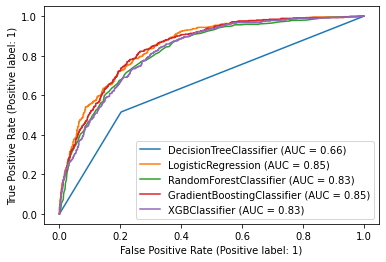

In [181]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plt.show()

### Gridsearchcv of Logistic regression

In [183]:
LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [185]:
from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=.20,random_state=991)
params = {'penalty': ['l1','l2'], 
          'C': [0.001,0.01,0.1,1,10,100,1000]
         }
GCV2 = GridSearchCV(LR,param_grid = params)
GCV2.fit(X_train,Y_train)
print('best_pram', GCV2.best_params_)

lr=GCV2.best_estimator_ #reinstantiating with best params

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

rf_confusion_mat = confusion_matrix(y_test,y_pred)

print('\nconfusion mat =>','\n',rf_confusion_mat )
print('\naccuracy_score =>','\n',accuracy_score(y_test,y_pred))

best_pram {'C': 10, 'penalty': 'l2'}

confusion mat => 
 [[929  98]
 [173 209]]

accuracy_score => 
 0.8076650106458482


### Increased the accuracy to 80.7 percent

In [187]:
import joblib
joblib.dump(GCV2.best_estimator_,'Customer_churn.pkl')

['Customer_churn.pkl']

In [188]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\customer churn analysis\Customer_churn.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,0
1,1
2,0
3,0
4,0
...,...
1404,0
1405,0
1406,0
1407,0
